In [1]:
import os
import hopsworks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('data/hopsworks-api-key.txt', 'r') as file:
    os.environ["HOPSWORKS_API_KEY"] = file.read().rstrip()
    
project = hopsworks.login()
fs = project.get_feature_store()

2025-01-05 17:06:19,731 INFO: Initializing external client
2025-01-05 17:06:19,732 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-01-05 17:06:21,773 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1159324


In [3]:
grailed_items_fg = fs.get_feature_group(
    name='draft_grailed_items',
    version=2,
)

In [4]:
grailed_items_fg.features

[Feature('id', 'bigint', None, True, False, None, None, 1393568),
 Feature('sold_at', 'timestamp', None, False, False, None, None, 1393568),
 Feature('designer_names', 'array<float>', None, False, False, None, None, 1393568),
 Feature('description', 'array<float>', None, False, False, None, None, 1393568),
 Feature('title', 'array<float>', None, False, False, None, None, 1393568),
 Feature('hashtags', 'array<string>', None, False, False, None, None, 1393568),
 Feature('category_path', 'string', None, False, False, None, None, 1393568),
 Feature('condition', 'bigint', None, False, False, None, None, 1393568),
 Feature('size', 'string', None, False, False, None, None, 1393568),
 Feature('color', 'string', None, False, False, None, None, 1393568),
 Feature('followerno', 'bigint', None, False, False, None, None, 1393568),
 Feature('sold_price', 'bigint', None, False, False, None, None, 1393568),
 Feature('embedded_hashtags', 'array<float>', None, False, False, None, None, 1393568)]

## Create feature view

In [5]:
features = ['designer_names', 'title', 'category_path', 'size', 'color', 'condition']
labels = ['sold_price']

In [6]:
selected_features = grailed_items_fg.select(features + labels)
selected_features.show(10)

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (2.18s) 


,designer_names,title,category_path,size,color,condition,sold_price
0,"[-0.031601675, 0.0020146728, 0.05064709, 0.033...","[-0.07234231, 0.02547096, 0.043225057, 0.00155...",bottoms.casual_pants,32,camo,2,90
1,"[-0.05352693, 0.08712817, 0.04073282, -0.02293...","[-0.086579934, 0.009786084, 0.015373386, -0.02...",tops.sweaters_knitwear,l,grey,2,100
2,"[0.026256513, -0.051035274, 0.0006324983, 0.00...","[-0.038383428, 0.05010801, 0.0024536746, -0.00...",tops.jerseys,l,navy,2,110
3,"[-0.03837172, 0.020790162, 0.041606624, -0.072...","[-0.0470728, 0.053835522, 0.06837271, -0.02697...",bottoms.leggings,26,camo,1,65
4,"[-0.002615375, -0.008588393, 0.04519368, -0.07...","[-0.019977197, 3.8269107e-05, 0.06975493, -0.0...",accessories.misc,one size,white,3,39
5,"[-0.040750112, -0.004846334, 0.0482456, 0.0030...","[-0.045855638, -0.0119385505, 0.05753709, -0.0...",tops.sweatshirts_hoodies,s,grey,2,248
6,"[-0.019721668, -0.011818303, 0.007883322, -0.0...","[-0.08649137, -0.011142856, 0.027363302, -0.04...",accessories.misc,one size,black,3,26
7,"[-0.042743836, -0.042903032, 0.044866435, -0.0...","[-0.048609685, 0.0006830724, 0.018770076, 0.01...",outerwear.light_jackets,l,blue black,1,135
8,"[-0.047228426, 0.074170455, -0.03471582, -0.03...","[-0.05823493, 0.10624947, 0.047216073, -0.0419...",footwear.boots,8,black,2,220
9,"[-0.050281346, 0.025167605, 0.027281737, 0.020...","[-0.05827724, 0.017197656, 0.037410572, 0.0104...",tops.button_ups,m,blue,2,60


In [7]:
feature_view = fs.get_or_create_feature_view(
    name='draft_grailed_items_fv',
    version=1,
    labels=['sold_price'],
    query=selected_features,
)

In [8]:
X_train, X_test, y_train, y_test = feature_view.train_test_split(test_size=0.2)

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.73s) 


In [9]:
X_train

,designer_names,title,category_path,size,color,condition
1,"[-0.05352693, 0.08712817, 0.04073282, -0.02293...","[-0.086579934, 0.009786084, 0.015373386, -0.02...",tops.sweaters_knitwear,l,grey,2
2,"[0.026256513, -0.051035274, 0.0006324983, 0.00...","[-0.038383428, 0.05010801, 0.0024536746, -0.00...",tops.jerseys,l,navy,2
3,"[-0.03837172, 0.020790162, 0.041606624, -0.072...","[-0.0470728, 0.053835522, 0.06837271, -0.02697...",bottoms.leggings,26,camo,1
5,"[-0.040750112, -0.004846334, 0.0482456, 0.0030...","[-0.045855638, -0.0119385505, 0.05753709, -0.0...",tops.sweatshirts_hoodies,s,grey,2
6,"[-0.019721668, -0.011818303, 0.007883322, -0.0...","[-0.08649137, -0.011142856, 0.027363302, -0.04...",accessories.misc,one size,black,3
...,...,...,...,...,...,...
297,"[-0.037526954, -0.018776597, 0.01180262, -0.00...","[-0.06365315, 0.0016540838, 0.026793046, -0.02...",tops.jerseys,m,blue,3
298,"[-0.036511738, 0.04379813, 0.04534051, -2.0139...","[-0.08380285, 0.033425484, -0.0054137064, 0.00...",outerwear.vests,m,biege,1
299,"[-0.044179566, -0.008883646, 0.009805159, 0.03...","[-0.04587763, -0.016004134, 0.045851115, 0.032...",tops.short_sleeve_shirts,l,white,2
300,"[-0.0206885, -0.01642324, 0.060750045, 0.00773...","[-0.032583278, -0.03534502, 0.0036314286, -0.0...",accessories.belts,one size,beige,2


## Create a predictive model

Candidates include: XGBoost, CatBoost (handles categorical features natively), KNN or a neural net.

In [11]:
def process_embeddings(df, embedding_columns):
    # Process all embedding columns and concatenate results
    processed_embeddings = pd.concat([
        pd.DataFrame(
            np.vstack(df[col].to_numpy()),
            columns=[f'{col}_{i}' for i in range(len(df[col].iloc[0]))],
            index=df.index
        ) for col in embedding_columns
    ], axis=1)
    
    # Combine with non-embedding columns
    return pd.concat([
        df.drop(embedding_columns, axis=1),
        processed_embeddings
    ], axis=1)

# Define embedding columns to process
embedding_cols = ['designer_names', 'title']

# Process train and test data
X_train_processed = process_embeddings(X_train, embedding_cols)
X_test_processed = process_embeddings(X_test, embedding_cols)

# Make sure indices match
X_train_processed = X_train_processed.loc[y_train.index]
X_test_processed = X_test_processed.loc[y_test.index]


In [14]:
from catboost import CatBoostRegressor, Pool

raw_categorical_features = ['category_path', 'size', 'color']

# Initialize the model
model = CatBoostRegressor(
    cat_features=raw_categorical_features,
    iterations=1000,
    # learning_rate=0.1,
    # depth=6,
    loss_function='RMSE',
    verbose=100  # Print training progress every 100 iterations
)

# Create CatBoost Pool objects
train_pool = Pool(
    data=X_train_processed,
    label=y_train,
    cat_features=raw_categorical_features
)

test_pool = Pool(
    data=X_test_processed,
    label=y_test,
    cat_features=raw_categorical_features
)

# Train the model
model.fit(
    train_pool,
    eval_set=test_pool,
    early_stopping_rounds=50
)

Learning rate set to 0.040726
0:	learn: 170.4529355	test: 128.9193094	best: 128.9193094 (0)	total: 172ms	remaining: 2m 52s
100:	learn: 100.8632435	test: 124.6079119	best: 124.6079119 (100)	total: 4.89s	remaining: 43.5s
200:	learn: 40.5612080	test: 115.9932200	best: 115.9417839 (199)	total: 11.2s	remaining: 44.3s
300:	learn: 13.6795626	test: 112.6862799	best: 112.5686026 (292)	total: 16.4s	remaining: 38s
400:	learn: 5.0384650	test: 111.8987219	best: 111.8987219 (400)	total: 20.8s	remaining: 31s
500:	learn: 1.9817956	test: 111.7035639	best: 111.7000808 (484)	total: 25s	remaining: 24.9s
600:	learn: 0.7779023	test: 111.6193257	best: 111.6145953 (598)	total: 31.6s	remaining: 21s
700:	learn: 0.3110839	test: 111.5916966	best: 111.5881945 (693)	total: 38s	remaining: 16.2s
800:	learn: 0.1585366	test: 111.5839623	best: 111.5839623 (800)	total: 43.7s	remaining: 10.8s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 111.5831149
bestIteration = 812

Shrink model to first 813 iterat

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting target values on the test set
y_pred = model.predict(X_test_processed)

# Calculating Mean Squared Error (MSE) using sklearn
mse = mean_squared_error(y_test.iloc[:,0], y_pred)
print("MSE:", mse)

# Calculating R squared using sklearn
r2 = r2_score(y_test.iloc[:,0], y_pred)
print("R squared:", r2)

MSE: 12450.791527496467
R squared: 0.24833134399243018


In [16]:
# TODO: Is the order correct?
predicted_df = y_test
predicted_df['predicted_price'] = y_pred

In [17]:
predicted_df

,sold_price,predicted_price
0,90,102.771162
4,39,122.110249
15,5,51.420425
17,65,53.292713
18,35,94.235553
...,...,...
275,300,112.709449
277,30,120.322980
284,90,96.959071
287,115,89.456302


### "Outdated" models

In [ ]:
import numpy as np
from xgboost import XGBRegressor

# Convert the embeddings column into a numpy array of separate columns
X_train_array = np.vstack(X_train['designers_title_embedding'].to_numpy())
X_test_array = np.vstack(X_test['designers_title_embedding'].to_numpy())

# Now train the model with the reshaped data
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train_array, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_array, y_train)

## Evaluate model

In [17]:
# TODO: Plot performance, consider saving the plots as images

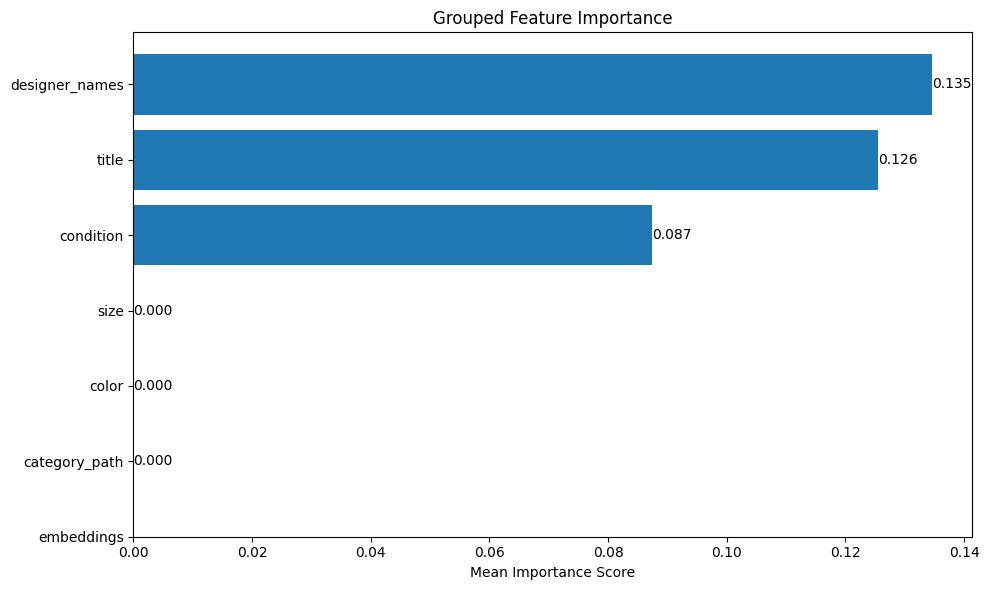

In [18]:
# TODO: Why is feature importance exactly 0 for unprocessed categorical features?
def plot_grouped_feature_importance(model, X_test_processed, original_feature_names=features, embedding_prefix='embedding_'):
    # Get feature importance scores
    feature_importance = model.get_feature_importance()
    feature_names = X_test_processed.columns
    
    # Create a dictionary to store grouped importance scores
    grouped_importance = {}
    
    # Group embedding features
    embedding_importance = np.mean([
        imp for name, imp in zip(feature_names, feature_importance)
        if name.startswith(embedding_prefix)
    ])
    grouped_importance['embeddings'] = embedding_importance
    
    # Group categorical features
    for feature in original_feature_names:
        feature_cols = [
            (name, imp) for name, imp in zip(feature_names, feature_importance)
            if name.startswith(feature)
        ]
        if feature_cols:  # If we found any columns for this feature
            grouped_importance[feature] = np.mean([imp for _, imp in feature_cols])
    
    # Create the plot
    fig, ax = plt.figure(figsize=(10, 6)), plt.axes()
    
    # Sort by importance
    sorted_importance = dict(sorted(grouped_importance.items(), key=lambda x: x[1]))
    
    # Plot horizontal bar chart
    y_pos = np.arange(len(sorted_importance))
    ax.barh(y_pos, list(sorted_importance.values()))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(sorted_importance.keys()))
    
    plt.title('Grouped Feature Importance')
    plt.xlabel('Mean Importance Score')
    
    # Add value labels on the bars
    for i, v in enumerate(sorted_importance.values()):
        ax.text(v, i, f'{v:.3f}', va='center')
    
    plt.tight_layout()
    return plt

# Usage:
plot_grouped_feature_importance(model, X_test_processed)
plt.show()

## Model registry

In [23]:
# Creating a directory for the model artifacts if it doesn't exist
model_dir = "price_predictor_model"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [24]:
# Save the model locally
model.save_model(os.path.join(model_dir, "catboost_model"))

In [25]:
# TODO: Save the model to model registry